In [1]:
import csv
with open('/home/fred/code/projecteuler_scala/trunc.tsv', 'r') as f:
    reader = csv.reader(f, dialect='excel', delimiter='\t')
    for row in reader:
        print(row)

['2', '2', '1']
['3', '3', '1']
['4', '2', '2']
['5', '5', '1']
['6', '2', '1', '3', '1']
['7', '7', '1']
['8', '2', '3']
['9', '3', '2']
['10', '2', '1', '5', '1']
['11', '11', '1']


In [2]:
with open('/home/fred/code/projecteuler_scala/factors.tsv', 'r') as f:
    reader = csv.reader(f, dialect='excel', delimiter='\t')
    primes = [int(x[0]) for x in reader if len(x) == 3 and x[2] == '1']
primes[:10]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [3]:
pdiffs = [x1 - x0 for x0, x1 in zip(primes, primes[1:])]
pdiffs[:10]

[1, 2, 2, 4, 2, 4, 2, 4, 6, 2]

In [4]:
max(pdiffs)

114

In [5]:
lenp = len(pdiffs)
lenp

78497

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [7]:
sum(1 for x in pdiffs if x == 1)

1

(array([  8170.,   8143.,  13549.,   5569.,   7079.,   8005.,   4233.,
         2881.,   4909.,   2401.,   2172.,   2682.,   1175.,   1234.,
         1914.,    550.,    557.,    767.,    330.,   2177.]), array([     1,      3,      5,      7,      9,     11,     13,     15,
           17,     19,     21,     23,     25,     27,     29,     31,
           33,     35,     37,     39, 100000]), <a list of 20 Patch objects>)


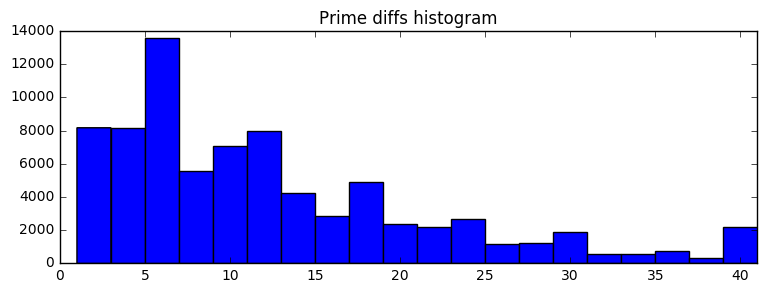

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(9, 3))
nbins = 20                   # there can never be two primes and odd number apart
print(axes.hist(pdiffs, bins=[2*x + 1 for x in range(nbins)] + [100000]))
axes.set_title("Prime diffs histogram")
axes.set_xlim(0, 2*nbins + 1);

c[0]=4321.0 c[1]=4315.0 s=39000.0


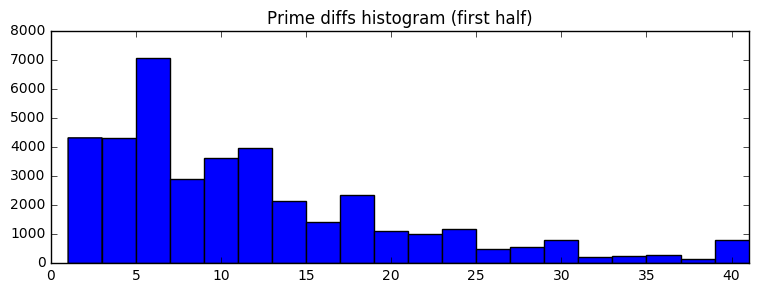

In [9]:
h1 = pdiffs[:39000]
fig, axes = plt.subplots(1, 1, figsize=(9, 3))
counts1 = axes.hist(h1, bins=[2*x + 1 for x in range(nbins)] + [100000])
print('c[0]={} c[1]={} s={}'.format(counts1[0][0], counts1[0][1], sum(counts1[0])))
axes.set_title("Prime diffs histogram (first half)")
axes.set_xlim(0, 2*nbins + 1);

c[0]=3849.0 c[1]=3828.0 s=39497.0


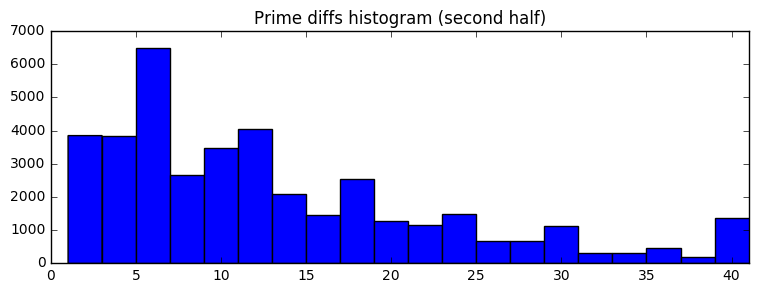

In [10]:
h2 = pdiffs[39000:]
fig, axes = plt.subplots(1, 1, figsize=(9, 3))
counts2 = axes.hist(h2, bins=[2*x + 1 for x in range(nbins)] + [100000])
print('c[0]={} c[1]={} s={}'.format(counts2[0][0], counts2[0][1], sum(counts2[0])))
axes.set_title("Prime diffs histogram (second half)")
axes.set_xlim(0, 2*nbins + 1);

c0s=[1248, 1083, 1038, 972, 989, 951, 936, 953]
cn1s=[86, 201, 250, 281, 305, 328, 355, 371]
sums=[9812, 9812, 9812, 9812, 9812, 9812, 9812, 9812]


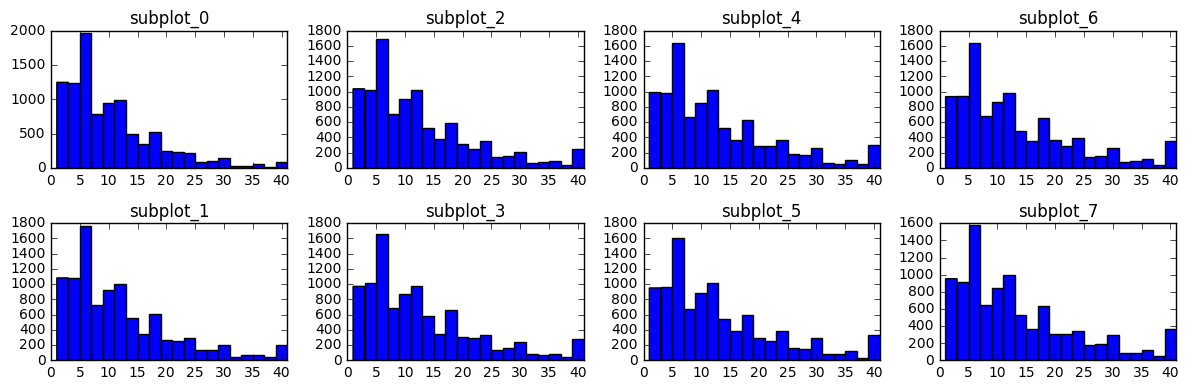

In [11]:
nrow = 2; ncol = 4
perplot = int(lenp / nrow / ncol)  # about 78000 total
fig, axes = plt.subplots(nrow, ncol, figsize=(12, 4))
count0s = []; countn1s = []; sums = []
for i in range(nrow * ncol):
  start = perplot * i
  end = perplot * (i + 1)
  axis = axes[i % nrow][int(i / nrow)] if nrow > 1 else axes[i]
  counts = axis.hist(pdiffs[start:end], bins=[2*x + 1 for x in range(nbins)] + [100000])
  #print('c[0]={} c[1]={} c[-1]={} s={}'.format(counts[0][0], counts[0][1], counts[0][-1], sum(counts[0])))
  count0s.append(int(counts[0][0]))
  countn1s.append(int(counts[0][-1]))
  sums.append(int(sum(counts[0])))
  axis.set_title("subplot_{}".format(i))
  axis.set_xlim(0, 2*nbins + 1)
fig.tight_layout()
print('c0s={}'.format(count0s)); print('cn1s={}'.format(countn1s)); print('sums={}'.format(sums))

It makes sense that these distributions all look the same.  They're effectively all removing the same subset of values (e.g. first they both remove all multiples of 2, then 3), except also notice that the "40 and up bin" grows.

The sequence of primes should be decomposable down into an infinite sequence of periodic functions (e.g. one with a periodicity of 2, on top of one with a periodicity of 3, 4, 5, etc.)  Wherever the sum hits 0 is where there's a prime.

In [12]:
xlim = 12
x = np.linspace(-1, xlim, 20*xlim)
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix', 'text.usetex': False})

In [42]:
r = 2
sin1 = lambda x: -sin(r * pi * x)
#tan1 = lambda x, Q: tan(pi * x / Q + pi/2)   # near multiples of primes sin1 cancels out this denominator
tan1 = lambda x, Q: sin(x * pi / Q + pi/2) / sin(x * pi / Q + pi)
notta_prime = lambda x, Q: (sin1(x) * tan1(x, Q)) / Q / r
def plot_notta_prime(Q):
  fig, ax = plt.subplots(figsize=(12, 3))
  ax.plot(x, [sin1(_) for _ in x])
  ax.plot(x, [tan1(_, Q) for _ in x])
  ax.plot(x, [notta_prime(_, Q) for _ in x])
  ax.set_xlim(0, xlim); ax.set_ylim(-4, 4); ax.grid(True)

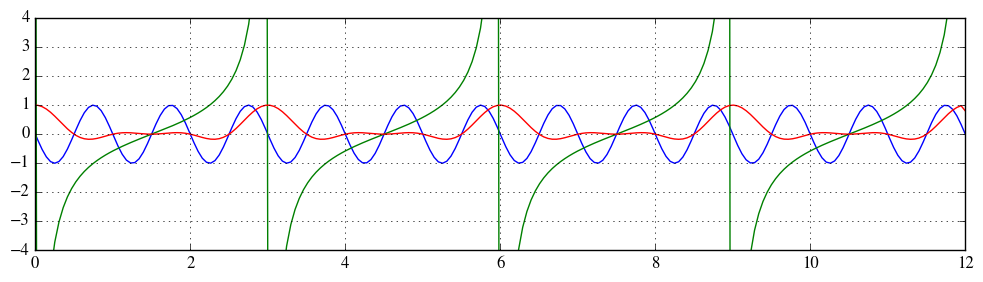

In [43]:
plot_notta_prime(3)

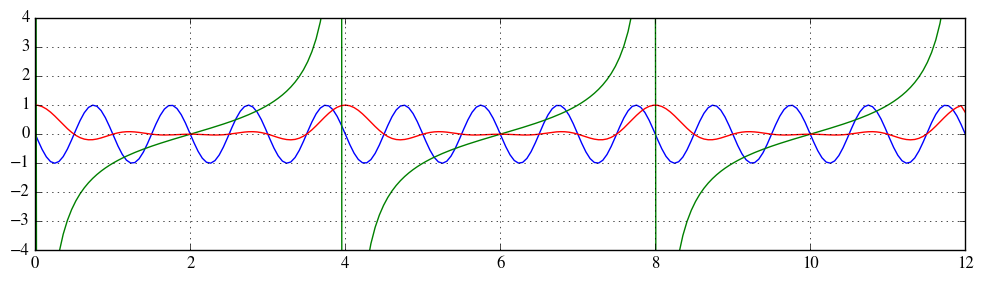

In [44]:
plot_notta_prime(4)

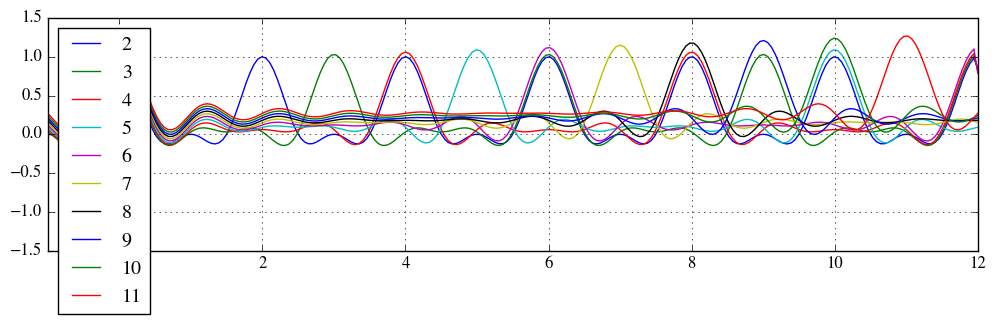

In [27]:
fig, ax = plt.subplots(figsize=(12, 3))
for Qm2 in range(xlim-2):
  Q = Qm2 + 2     # NOTE: adding a little multiple of Qm2 so that the curves don't precisely overlap...
  ax.plot(x, [notta_prime(_, Q) + 0.03*Qm2 for _ in x], label=Q)               # ...for better visibility
ax.set_xlim(-1, xlim); ax.set_ylim(-1.5, 1.5); ax.grid(True)
ax.legend(loc=2);

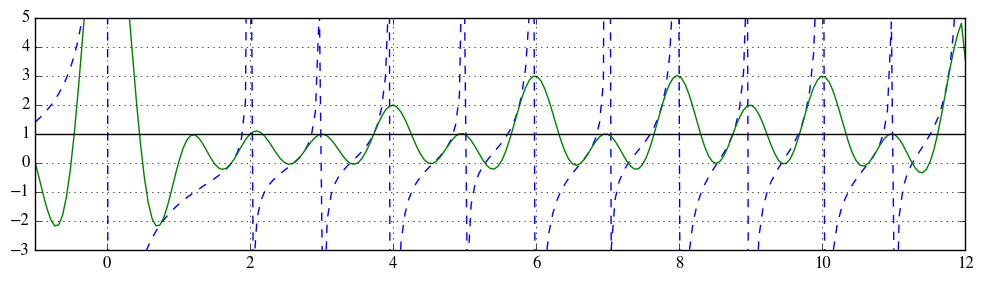

In [47]:
def tan1acc(x, Q):
  t = tan1(x, Q) / Q / r
  if Q <= 2: return t
  return t + tan1acc(x, Q-1)
fig, ax = plt.subplots(figsize=(12, 3))
Q = xlim
ax.plot(x, [          tan1acc(_, Q) for _ in x], 'b--')
ax.plot(x, [sin1(_) * tan1acc(_, Q) for _ in x], 'g')
ax.plot(x, [1 for _ in x], 'black')
ax.set_xlim(-1, xlim); ax.set_ylim(-3, 5); ax.grid(True)

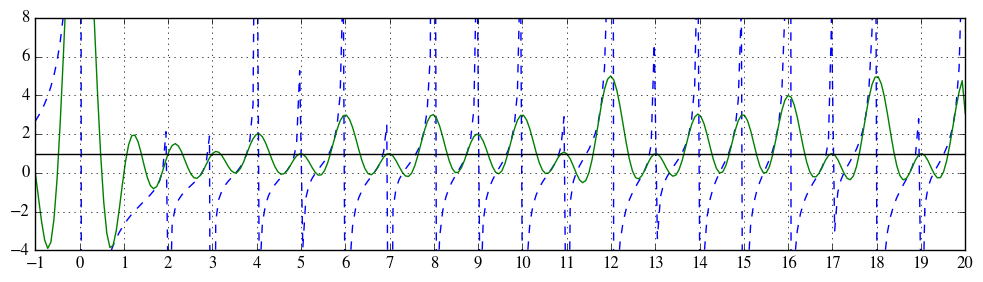

In [29]:
x2lim = 20
x2 = np.linspace(-1, x2lim, 15*x2lim)
fig, ax = plt.subplots(figsize=(12, 3))
Q = x2lim
ax.plot(x2, [             tan1acc(_, Q) for _ in x2], 'b--')
ax.plot(x2, [sin1(_) * tan1acc(_, Q) for _ in x2], 'g')
ax.plot(x2, [1 for _ in x2], 'black')
ax.set_xlim(-1, x2lim); ax.set_ylim(-4, 8); ax.grid(True)
ax.set_xticks(np.arange(-1, x2lim+1, 1.0));

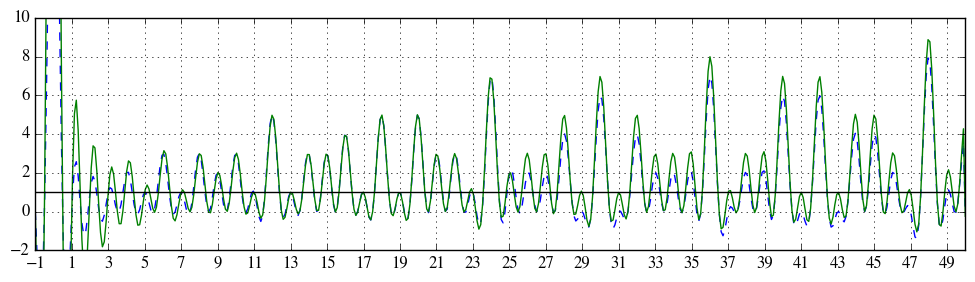

In [30]:
x3lim = 50
x3 = np.linspace(-1, x3lim, 10*x3lim)
fig, ax = plt.subplots(figsize=(12, 3))
Q = x3lim
ax.plot(x3, [sin1(_) * tan1acc(_, Q/2) for _ in x3], 'b--')
ax.plot(x3, [sin1(_) * tan1acc(_, Q  ) for _ in x3], 'g')
ax.plot(x3, [1 for _ in x3], 'black')
ax.set_xlim(-1, x3lim); ax.set_ylim(-2, 10); ax.grid(True)
ax.set_xticks(np.arange(-1, x3lim+1, 2.0));

In [32]:
nprimes = 30
Q = primes[nprimes]
ep = 1e-10
[(_, sin1(_-ep) * tan1acc(_-ep, Q), sin1(_+ep) * tan1acc(_+ep, Q)) for _ in primes[:nprimes]]

[(2, 0.9999992144249672, 1.0000007855774549),
 (3, 0.9999988267689589, 1.0000011732365028),
 (5, 1.000003703182231, 1.0000076055321738),
 (7, 1.0000029242237622, 1.0000083845052312),
 (11, 0.9999730946905354, 0.9999816713534416),
 (13, 1.0000062404250856, 1.0000163774597381),
 (17, 1.000010335942253, 1.00002359109841),
 (19, 1.0000039019354205, 1.0000187160661183),
 (23, 1.0000079975914702, 1.0000485491896602),
 (29, 0.999974560258578, 1.000056544890106),
 (31, 0.9999596446773356, 1.0000064303557596),
 (37, 0.9999968851918606, 1.0000031149878021),
 (41, 0.9999868449270727, 1.0000414288055597),
 (43, 1.0000228169018661, 1.0000337256810785),
 (47, 0.9999647184759084, 0.9999787404601044),
 (53, 0.9999849953715776, 1.0000489322169985),
 (59, 0.9998865543293161, 0.9999099212312976),
 (61, 0.9999338215424756, 1.000003989047592),
 (67, 0.9998947415228766, 0.9999243464095773),
 (71, 0.9999553641628556, 0.9999880960711611),
 (73, 0.9998302166302871, 0.9999097231039672),
 (79, 0.9998391880670041

What is the integral of this function up there?  Map it.

The value of the infinite sum of continuous functions is the infinite sum of the values of those functions, but computing an infinite number of values isn't possible.

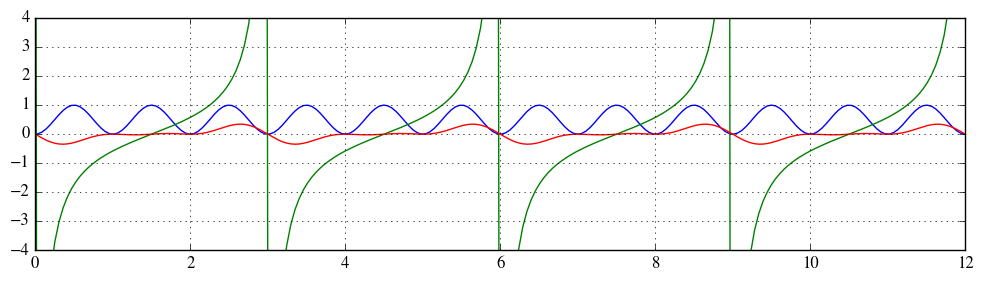

In [35]:
# sin_2 might be easier to differentiate, though doesn't appear that it's 1 where tan1=inf (its
# slope is consistent (-3/2) there though)
sin1_2 = lambda x, Q: (sin(x * pi * r / r))**2
notta_prime_2 = lambda x, Q: (sin1_2(x, Q) * tan1(x, Q)) / Q / r
def plot_notta_prime_2(Q):
  fig, ax = plt.subplots(figsize=(12, 3))
  ax.plot(x, [sin1_2(_, Q) for _ in x])
  ax.plot(x, [tan1(_, Q) for _ in x])
  ax.plot(x, [notta_prime_2(_, Q) for _ in x])
  ax.set_xlim(0, xlim); ax.set_ylim(-4, 4); ax.grid(True)
plot_notta_prime_2(3)

12/12/16 - Posted this function as a question on StackExchange-Mathematics: http://math.stackexchange.com/questions/2055655/reducible-and-or-studied

A prime number is a thing A that is defined by not being any of a number of other things Bs.  So the only way to determine if it's an A is to rule out all the other Bs--unless there are clues, which we know there are.

For example if the digits in the number add up to a multiple of 3, then we know it's not a prime.  This rules out one factor, namely 3, but if a seprate clue is required for every element of B, then we haven't gotten very far.  [Aside: Is there a base, for any given prime, P, such that if the sum of the digits of a number, when represented in that base, are divisible by P, then the number is also divisible by P?]

So are there clues that can rule out more than one prime at a time?  For example, is there single clue that can rule out all factors of 3 and 5 simultaneously?  Perhaps not, but perhaps something could be done with the primes at the leaves of a binary tree such that the node one level above a R and a L prime indicates that 

[Sieve of Eratosthenes in 0(n) time complexity](http://www.geeksforgeeks.org/sieve-eratosthenes-0n-time-complexity/)